#📌 **EXTRACCION**

##**1.  Extracción y verificación de los datos**



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url ='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##**2. Normalización de las columnas: customer, phone, internet y acount**

In [ ]:
# Extraer y normalizar la columna 'customer'
customer_df = pd.json_normalize(datos['customer'])
customer_df

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
# Extraer y normalizar la columna 'phone'
phone_df = pd.json_normalize(datos['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
# Extraer y normalizar la columna 'internet'
internet_df = pd.json_normalize(datos['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
# Extraer y normalizar la columna 'account'
account_df = pd.json_normalize(datos['account'])
account_df

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


##**3. Creación de DataFrame con todas las columnas**

In [ ]:
# Concatenar todos los DataFrames normalizados con los datos originales (excluyendo las columnas anidadas)
df = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df.sample(3))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5756,7861-UVUFT,Yes,Female,0,Yes,No,15,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.30,1308.4
1385,2001-MCUUW,No,Male,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2
3423,4741-WWJQZ,No,Female,0,Yes,No,2,Yes,No,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.15,194.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
filas_nulas_charges_total = df[df['Charges.Total'].isnull()]
display(filas_nulas_charges_total)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


#🔧 TRANSFORMACIÓN

##**Revisando lo los valores únicos**

In [ ]:
# Verifique si hay valores únicos en cada columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50:  # Solo mostramos los valores únicos si hay menos de 50

    print(df[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores único

##Eliminar filas sin datos en columna 'Churn'

La columna 'Churn' presenta valores vacios los cuales se procede a eliminar la fila completa que lo contiene y creando un nuevo DataFrame llamado `df_act` el cual continene las entradas con valores con información

In [ ]:
# Actualizar el DataFrame df para excluir las filas donde 'Churn' es una cadena vacía
df_act = df[df['Churn'] != ''].reset_index(drop=True)

# Verificar los valores únicos en la columna 'Churn' después de la eliminación
print("Valores únicos en la columna 'Churn' después de la limpieza:")
print(df_act['Churn'].unique())

Valores únicos en la columna 'Churn' después de la limpieza:
['No' 'Yes']


Conversion de los valores de la columna 'Charges.Total' de object a float64 y además se reemplazan por cero (0) aquellos valores que al convertise a número resultaron como nulos.

In [ ]:
# Convertir la columna 'Charges.Total' a tipo float64
df_act['Charges.Total'] = pd.to_numeric(df_act['Charges.Total'], errors='coerce')

# Reemplazar los valores nulos en 'Charges.Total' por 0
df_act['Charges.Total'] = df_act['Charges.Total'].fillna(0)

Por último se elemina la palabra `automatic` de la columna 'PaymentMethod', incluyendo espcios y parentesis.

In [ ]:
# Eliminar la palabra "automatic" de la columna 'PaymentMethod'. Incluye el espacio y los parentesis
df_act['PaymentMethod'] = df_act['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

## Insertar columna de cuenta diaria 'Charges.Daily'

In [ ]:
# Calcular la columna 'Charges.Daily'
df_act['Charges.Daily'] = (df_act['Charges.Monthly'] / 365) / 12

# Redondear la columna 'Charges.Daily' a 3 decimales
df_act['Charges.Daily'] = df_act['Charges.Daily'].round(3)

# Identificar la posición de la columna 'Charges.Monthly'
cols = df_act.columns.tolist()
charges_monthly_index = cols.index('Charges.Monthly')

# Eliminar la columna 'Charges.Daily' de su posición actual
charges_daily_col = df_act.pop('Charges.Daily')

# Insertar la columna 'Charges.Daily' en la posición deseada (justo antes de 'Charges.Monthly')
df_act.insert(charges_monthly_index, 'Charges.Daily', charges_daily_col)

# Mostrar las columnas relevantes para verificar la nueva columna y su posición
display(df_act[['PaymentMethod', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total']].head())

,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,Mailed check,0.015,65.6,593.30
1,Mailed check,0.014,59.9,542.40
2,Electronic check,0.017,73.9,280.85
3,Electronic check,0.022,98.0,1237.85
4,Mailed check,0.019,83.9,267.40


## Aplicar mapeo y convertir tipo

Iterar sobre las columnas identificadas, aplicar el mapeo y convertir el tipo de dato a `int64`.


In [ ]:
columns_to_convert = []
for col in df_act.columns:
    unique_values = df_act[col].unique()
    # Check if the unique values are exactly 'No' and 'Yes'
    if set(unique_values) == {'No', 'Yes'}:
        columns_to_convert.append(col)

print("Columns identified for conversion (only 'No' and 'Yes'):")
print(columns_to_convert)

Columns identified for conversion (only 'No' and 'Yes'):
['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [ ]:
# Define el diccionario de mapeo
mapping_dict = {'No': 0, 'Yes': 1}

# Aplicar el mapeo y convertir las columnas a int64
for col in columns_to_convert:
    df_act[col] = df_act[col].replace(mapping_dict).astype('int64')

# Verificar los tipos de datos y los valores únicos de las columnas modificadas
print("Tipos de datos después de la conversión:")
print(df_act[columns_to_convert].dtypes)

print("\nValores únicos después de la conversión:")
for col in columns_to_convert:
    print(f"'{col}': {df_act[col].unique()}")

Tipos de datos después de la conversión:
Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
dtype: object

Valores únicos después de la conversión:
'Churn': [0 1]
'Partner': [1 0]
'Dependents': [1 0]
'PhoneService': [1 0]
'PaperlessBilling': [1 0]


In [ ]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


#📊 CARGA Y ANÁLISIS

##**1. Metricas**

En la siguiente etapa se muestrra un set metricas para visualizar los datos de entradas,  presentado en tablas con resumen con el objetivo de tener un resumen preliminar de la conducta de los datos

* **KPIs**: tasa de churn base y promedios → el “tablero” para comparar todo lo demás.
* **Churn por categoría**: muestra **segmentos críticos** (p. ej., contrato mensual, pago electrónico, etc.) y el lift vs. el promedio.
* **Numéricas por churn**: compara **tenure** y **cargos** entre quienes se van y quienes se quedan.
* **Ingreso mensual en riesgo**: cuantifica el impacto financiero inmediato de las bajas.
* **Buckets de tenur**e: detecta si el churn es **temprano** o de **fatiga**.
* **CLV proxy**: dimensiona el valor que se pierde cuando se va un cliente.

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display


df = df_act.copy()


# KPIs generales

n_customers   = len(df)
churn_rate    = float(df['Churn'].mean())
retention     = 1.0 - churn_rate
avg_tenure    = float(df['tenure'].mean())
avg_monthly   = float(df['Charges.Monthly'].mean())
avg_total     = float(df['Charges.Total'].mean())

kpis = pd.DataFrame(
    {'valor': [n_customers, churn_rate, retention, avg_tenure, avg_monthly, avg_total]},
    index=['Clientes', 'Churn rate', 'Retention rate', 'Tenure promedio (meses)', 'Cargo mensual promedio', 'Gasto total promedio']
)


#Tasa de churn por categoría (segmentos)
cat_cols = [
    'Contract','PaymentMethod','InternetService','PaperlessBilling','SeniorCitizen','Partner',
    'Dependents','gender','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

def churn_table(df, by):
    overall = df['Churn'].mean()
    out = (df.groupby(by, dropna=False)['Churn']
             .agg(churn_rate='mean', n='count'))
    out['churn_rate_pct']   = (out['churn_rate']*100).round(2)
    out['lift_vs_overall']  = (out['churn_rate'] / overall).round(2) if overall > 0 else np.nan
    return out.sort_values('churn_rate', ascending=False)

tables_by_cat = {c: churn_table(df, c) for c in cat_cols}


# Métricas numéricas por estado de churn
num_cols = ['tenure','Charges.Daily','Charges.Monthly','Charges.Total']

def numeric_summary_by_churn(df, cols):
    res = {}
    for col in cols:
        tmp = df.groupby('Churn')[col].agg(
            n='count', mean='mean', median='median', std='std',
            p25=lambda s: s.quantile(0.25), p75=lambda s: s.quantile(0.75),
            min='min', max='max'
        )
        res[col] = tmp
    return res

numeric_by_churn = numeric_summary_by_churn(df, num_cols)


# Ingreso mensual en riesgo (clientes churn)
monthly_revenue_at_risk = float(df.loc[df['Churn'] == 1, 'Charges.Monthly'].sum())
ingreso_en_riesgo = pd.DataFrame({'monthly_revenue_at_risk':[monthly_revenue_at_risk]})


# Buckets de antigüedad (tenure) y churn
max_tenure = int(df['tenure'].max())
bins   = [-1, 6, 12, 24, 48, 72, max_tenure] if max_tenure > 72 else [-1, 6, 12, 24, 48, max_tenure]
labels = ['0-6','7-12','13-24','25-48','49-72', f'73-{max_tenure}'] if max_tenure > 72 else ['0-6','7-12','13-24','25-48', f'49-{max_tenure}']

df['tenure_bucket'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

churn_by_tenure_bucket = churn_table(df, 'tenure_bucket')

# ARPU y CLV proxy (sencillos)
df['ARPU_monthly'] = df['Charges.Monthly']                 # ya es el gasto mensual promedio
df['CLV_proxy']    = df['ARPU_monthly'] * df['tenure']     # proxy sin descuento
clv_by_churn = df.groupby('Churn')['CLV_proxy'].agg(['mean','median','count'])


# Mostrar resultados
display(kpis.style.format({'valor': '{:,.2f}'}).set_caption('KPIs generales'))
for c, t in tables_by_cat.items():
    display(t.style.format({'churn_rate':'{:.3f}','churn_rate_pct':'{:.2f}','lift_vs_overall':'{:.2f}'})
            .set_caption(f'Tasa de Churn por {c}'))
for col, table in numeric_by_churn.items():
    display(table.style.format('{:,.2f}').set_caption(f'Métricas de {col} por Churn'))
display(ingreso_en_riesgo.style.format('{:,.2f}').set_caption('Ingreso mensual en riesgo (clientes churn)'))
display(churn_by_tenure_bucket.style.format({'churn_rate':'{:.3f}','churn_rate_pct':'{:.2f}','lift_vs_overall':'{:.2f}'})
        .set_caption('Churn por bucket de tenure'))
display(clv_by_churn.style.format('{:,.2f}').set_caption('CLV proxy por Churn'))

,valor
Clientes,"7,043.00"
Churn rate,0.27
Retention rate,0.73
Tenure promedio (meses),32.37
Cargo mensual promedio,64.76
Gasto total promedio,"2,279.73"


,churn_rate,n,churn_rate_pct,lift_vs_overall
Contract,,,,
Month-to-month,0.427,3875,42.71,1.61
One year,0.113,1473,11.27,0.42
Two year,0.028,1695,2.83,0.11


,churn_rate,n,churn_rate_pct,lift_vs_overall
PaymentMethod,,,,
Electronic check,0.453,2365,45.29,1.71
Mailed check,0.191,1612,19.11,0.72
Bank transfer,0.167,1544,16.71,0.63
Credit card,0.152,1522,15.24,0.57


,churn_rate,n,churn_rate_pct,lift_vs_overall
InternetService,,,,
Fiber optic,0.419,3096,41.89,1.58
DSL,0.190,2421,18.96,0.71
No,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
PaperlessBilling,,,,
1,0.336,4171,33.57,1.26
0,0.163,2872,16.33,0.62


,churn_rate,n,churn_rate_pct,lift_vs_overall
SeniorCitizen,,,,
1,0.417,1142,41.68,1.57
0,0.236,5901,23.61,0.89


,churn_rate,n,churn_rate_pct,lift_vs_overall
Partner,,,,
0,0.330,3641,32.96,1.24
1,0.197,3402,19.66,0.74


,churn_rate,n,churn_rate_pct,lift_vs_overall
Dependents,,,,
0,0.313,4933,31.28,1.18
1,0.155,2110,15.45,0.58


,churn_rate,n,churn_rate_pct,lift_vs_overall
gender,,,,
Female,0.269,3488,26.92,1.01
Male,0.262,3555,26.16,0.99


,churn_rate,n,churn_rate_pct,lift_vs_overall
PhoneService,,,,
1,0.267,6361,26.71,1.01
0,0.249,682,24.93,0.94


,churn_rate,n,churn_rate_pct,lift_vs_overall
MultipleLines,,,,
Yes,0.286,2971,28.61,1.08
No,0.250,3390,25.04,0.94
No phone service,0.249,682,24.93,0.94


,churn_rate,n,churn_rate_pct,lift_vs_overall
OnlineSecurity,,,,
No,0.418,3498,41.77,1.57
Yes,0.146,2019,14.61,0.55
No internet service,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
OnlineBackup,,,,
No,0.399,3088,39.93,1.50
Yes,0.215,2429,21.53,0.81
No internet service,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
DeviceProtection,,,,
No,0.391,3095,39.13,1.47
Yes,0.225,2422,22.50,0.85
No internet service,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
TechSupport,,,,
No,0.416,3473,41.64,1.57
Yes,0.152,2044,15.17,0.57
No internet service,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
StreamingTV,,,,
No,0.335,2810,33.52,1.26
Yes,0.301,2707,30.07,1.13
No internet service,0.074,1526,7.40,0.28


,churn_rate,n,churn_rate_pct,lift_vs_overall
StreamingMovies,,,,
No,0.337,2785,33.68,1.27
Yes,0.299,2732,29.94,1.13
No internet service,0.074,1526,7.40,0.28


,n,mean,median,std,p25,p75,min,max
Churn,,,,,,,,
0,"5,174.00",37.57,38.00,24.11,15.00,61.00,0.00,72.00
1,"1,869.00",17.98,10.00,19.53,2.00,29.00,1.00,72.00


,n,mean,median,std,p25,p75,min,max
Churn,,,,,,,,
0,"5,174.00",0.01,0.01,0.01,0.01,0.02,0.00,0.03
1,"1,869.00",0.02,0.02,0.01,0.01,0.02,0.00,0.03


,n,mean,median,std,p25,p75,min,max
Churn,,,,,,,,
0,"5,174.00",61.27,64.43,31.09,25.10,88.40,18.25,118.75
1,"1,869.00",74.44,79.65,24.67,56.15,94.20,18.85,118.35


,n,mean,median,std,p25,p75,min,max
Churn,,,,,,,,
0,"5,174.00","2,549.91","1,679.53","2,329.95",572.90,"4,262.85",0.00,"8,672.45"
1,"1,869.00","1,531.80",703.55,"1,890.82",134.50,"2,331.30",18.85,"8,684.80"


,monthly_revenue_at_risk
0,"139,130.85"


,churn_rate,n,churn_rate_pct,lift_vs_overall
tenure_bucket,,,,
0-6,0.529,1481,52.94,1.99
7-12,0.359,705,35.89,1.35
13-24,0.287,1024,28.71,1.08
25-48,0.204,1594,20.39,0.77
49-72,0.095,2239,9.51,0.36


,mean,median,count
Churn,,,
0,"2,549.77","1,687.12","5,174.00"
1,"1,531.61",700.00,"1,869.00"


##**Distribución de Churn (evasión) en general**

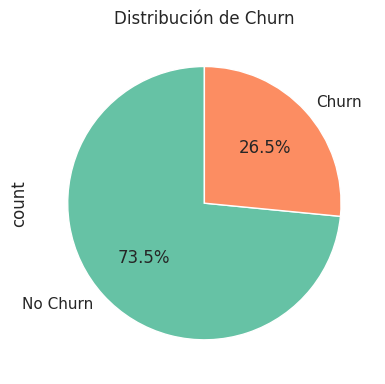

In [ ]:
import matplotlib.pyplot as plt

# Distribución general de Churn
fig, ax = plt.subplots(1,  figsize=(10,4))

# Pie chart
df['Churn'].value_counts().plot.pie(
    labels=['No Churn','Churn'], autopct='%1.1f%%',
    colors=['#66c2a5','#fc8d62'], ax=ax, startangle=90
)
ax.set_title('Distribución de Churn')

plt.tight_layout()
plt.show()

##**Visualizaciones**

Es importante atender en esta esta etapa los conceptos de cada una de las columnas, para eso dejo el link para visualizar en el [**diccionario de datos** ](https://raw.githubusercontent.com/ro-kazz/Challenge-DS-LATAM-Telecom-P1/149e0ce22a9a9cfe6966190e8f2cc55c8232c7fb/TelecomX_diccionario.md)

###**A - Demografía vs. Churn**

Entender si existen diferencias relevantes en la tasa de churn según características demográficas básicas:

* Género (`gender`)
* Edad avanzada (65 o más) (`SeniorCitizen`)
* Situación familiar (`Partner, Dependents`)
* Esto nos ayudará a perfilar el tipo de cliente que tiende a abandonar la empresa.

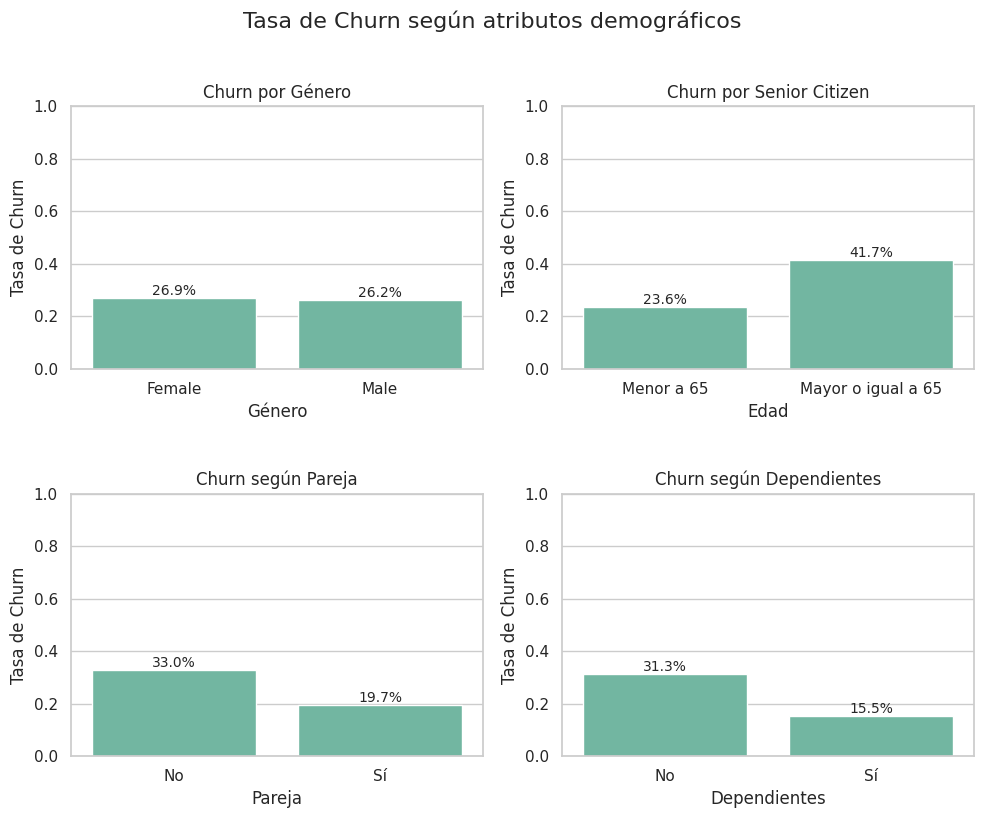

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia de trabajo
df = df_act.copy()

# Ajuste estético
sns.set(style="whitegrid", palette="Set2")

# Función auxiliar para agregar porcentajes sobre las barras
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Lienzo de 2x2 para visualización de todos los gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Tasa de Churn según atributos demográficos', fontsize=16, y=1.02)

# 1. Churn por género
ax = axes[0, 0]
sns.barplot(data=df, x='gender', y='Churn', estimator=lambda x: sum(x)/len(x), ax=ax, ci=None)
ax.set_title('Churn por Género')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Género')
ax.set_ylim(0, 1)
add_percentage_labels(ax)

# 2. Churn por SeniorCitizen
ax = axes[0, 1]
sns.barplot(data=df, x='SeniorCitizen', y='Churn', estimator=lambda x: sum(x)/len(x), ax=ax, ci=None)
ax.set_title('Churn por Senior Citizen')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Edad')
ax.set_ylim(0, 1)
ax.set_xticklabels(['Menor a 65', 'Mayor o igual a 65'])
add_percentage_labels(ax)

# 3. Churn por Partner
ax = axes[1, 0]
sns.barplot(data=df, x='Partner', y='Churn', estimator=lambda x: sum(x)/len(x), ax=ax, ci=None)
ax.set_title('Churn según Pareja')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Pareja')
ax.set_ylim(0, 1)
ax.set_xticklabels(['No', 'Sí'])
add_percentage_labels(ax)

# 4. Churn por Dependents
ax = axes[1, 1]
sns.barplot(data=df, x='Dependents', y='Churn', estimator=lambda x: sum(x)/len(x), ax=ax, ci=None)
ax.set_title('Churn según Dependientes')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Dependientes')
ax.set_ylim(0, 1)
ax.set_xticklabels(['No', 'Sí'])
add_percentage_labels(ax)


# Remover las líneas de la cuadrícula horizontal de todos los ejes
#for ax in axes.flat:
#    ax.yaxis.grid(False)

plt.tight_layout(h_pad=3.0) # Ajusta h_pad para aumentar el espacio vertical
plt.show()

**Interpretación de graficos**

**Género:**
La diferencia de barras es mínima, significa que el género no es un predictor relevante del churn.

**SeniorCitizen:**
Un valor significativamente mayor para 1 indicaría que los clientes igual o mayores de 65 años abandonan más, lo que puede sugerir problemas de servicio, adaptación tecnológica o precios.

**Pareja:**
Clientes con pareja suelen tener menor churn, posiblemente por mayor estabilidad de ingresos o planes familiares.

**Dependiente:**
Clientes con dependientes podrían valorar más la estabilidad de los servicios y abandonar menos.

###**B - Comportamiento Contractual**##

Identificar si el tipo de contrato, el tiempo como cliente y los montos pagados están asociados a una mayor probabilidad de Churn.
Esto es clave porque aquí suelen aparecer las relaciones más fuertes en empresas de telecomunicaciones

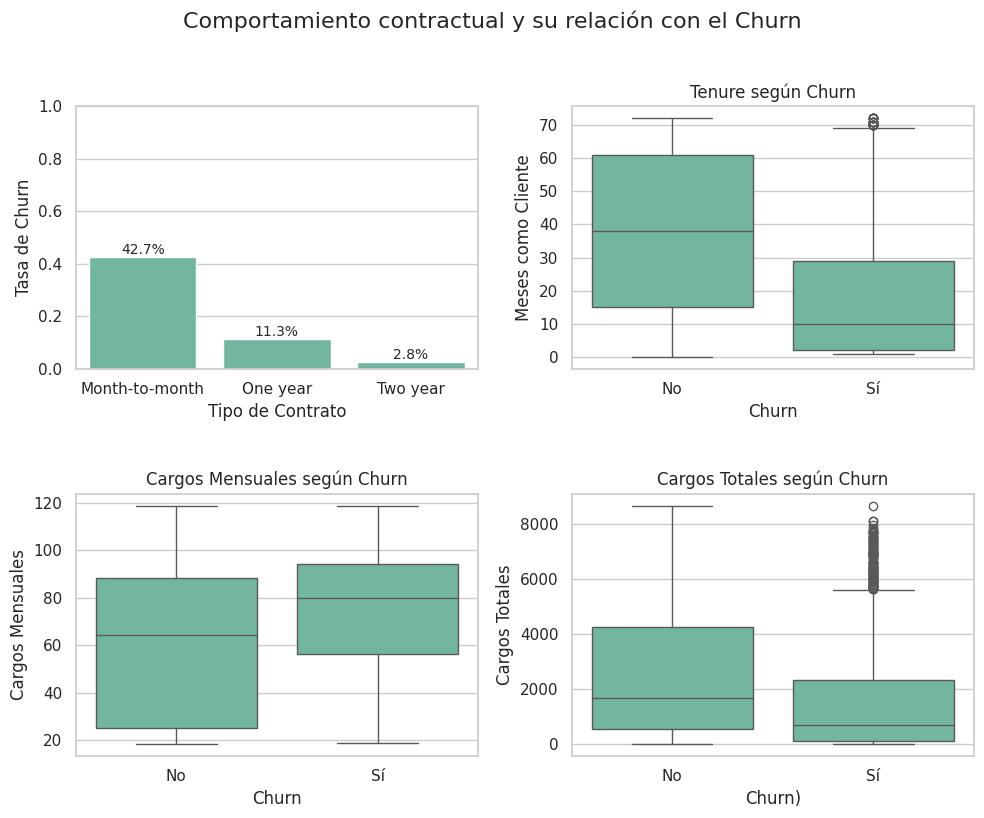

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_act.copy()
sns.set(style="whitegrid", palette="Set2")

# Función para agregar porcentaje en barras
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=10)

# Lienzo 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Comportamiento contractual y su relación con el Churn', fontsize=16, y=1.02)

# 1. Churn por tipo de contrato
ax = axes[0, 0]
sns.barplot(data=df, x='Contract', y='Churn', estimator=lambda x: sum(x)/len(x), order=['Month-to-month', 'One year', 'Two year'], ax=ax,ci=None)
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Tipo de Contrato')
ax.set_ylim(0, 1)
add_percentage_labels(ax)

# 2. Tenure vs Churn
ax = axes[0, 1]
sns.boxplot(data=df, x='Churn', y='tenure', ax=ax)
ax.set_title('Tenure según Churn')
ax.set_xlabel('Churn')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylabel('Meses como Cliente')

# 3. Cargos Mensuales vs Churn
ax = axes[1, 0]
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=ax)
ax.set_title('Cargos Mensuales según Churn')
ax.set_xlabel('Churn')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylabel('Cargos Mensuales')

# 4. Cargos Totales vs Churn
ax = axes[1, 1]
sns.boxplot(data=df, x='Churn', y='Charges.Total', ax=ax)
ax.set_title('Cargos Totales según Churn')
ax.set_xlabel('Churn)')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylabel('Cargos Totales')

plt.tight_layout(h_pad=3.0)
plt.show()


**Interpretación de graficos**

* Los contratos **Month-to-month** suelen tener tasas de churn mucho más altas que los de **One year** o **Two year**, ya que el compromiso puede ser menor.
* Clientes con churn tienden a tener menor tenure en realación a churn **temprano**.
* Cargos mensuales: Dado que la mediana es más alta para churn, puede indicar **sensibilidad al precio**.
* Cargos totales: Es posible que los clientes que se van, suelan tener menor gasto total porque han permanecido menos tiempo.

###**C – Análisis de Servicios Contratados**

Explorar si la contratación o no de ciertos servicios adicionales (Internet, seguridad en línea, soporte técnico, TV, películas) está asociada con mayor probabilidad de Churn.

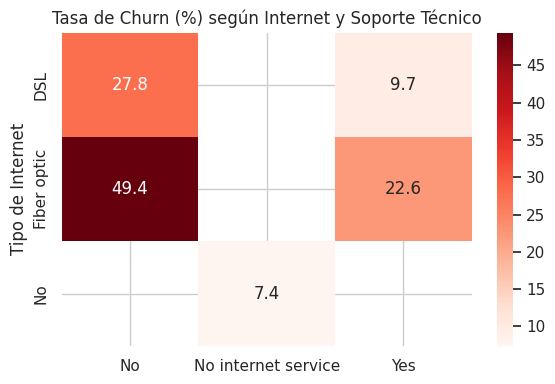

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = df_act.copy()
sns.set(style="whitegrid", palette="Set2")

# 1. Heatmap de churn por tipo de servicio
servicios = [
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

# Crear tabla con tasa de churn por categoría
churn_por_servicio = pd.DataFrame()
for s in servicios:
    tabla = df.groupby(s)['Churn'].mean().reset_index()
    tabla.columns = [s, 'ChurnRate']
    tabla['ChurnRate'] = tabla['ChurnRate'] * 100
    churn_por_servicio = pd.concat([churn_por_servicio, tabla.set_index(s).T])

# Ajustar formato (esto parece ser para el heatmap, no para el barplot)
churn_heatmap = df.groupby(servicios)['Churn'].mean().unstack('InternetService', fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(df.groupby(['InternetService','TechSupport'])['Churn'].mean().unstack()*100,
            annot=True, fmt=".1f", cmap="Reds")
plt.title('Tasa de Churn (%) según Internet y Soporte Técnico', fontsize=12)
plt.ylabel('Tipo de Internet')
plt.xlabel('')
plt.tight_layout(h_pad=7.0)
plt.show()



Mapa de calor:
* Detecta combinaciones críticas de clientes con Fiberoptic y DSL sin Soporte Técnico abarcando 72.2% clientes churn

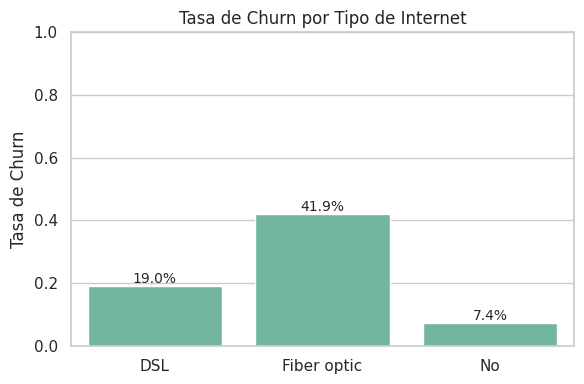

In [ ]:
# 2. Churn por tipo de InternetService
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x='InternetService', y='Churn', estimator=lambda x: sum(x)/len(x),
                 order=['DSL','Fiber optic','No'], ci=None) # ci=None para quitar las barras de error
ax.set_title('Tasa de Churn por Tipo de Internet')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('')
ax.set_ylim(0, 1)
# Añadir porcentajes sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout(h_pad=7.0)
plt.show()



Clientes sin Internet suelen tener churn muy bajo (pueden estar en planes mínimos o solo telefonía fija).

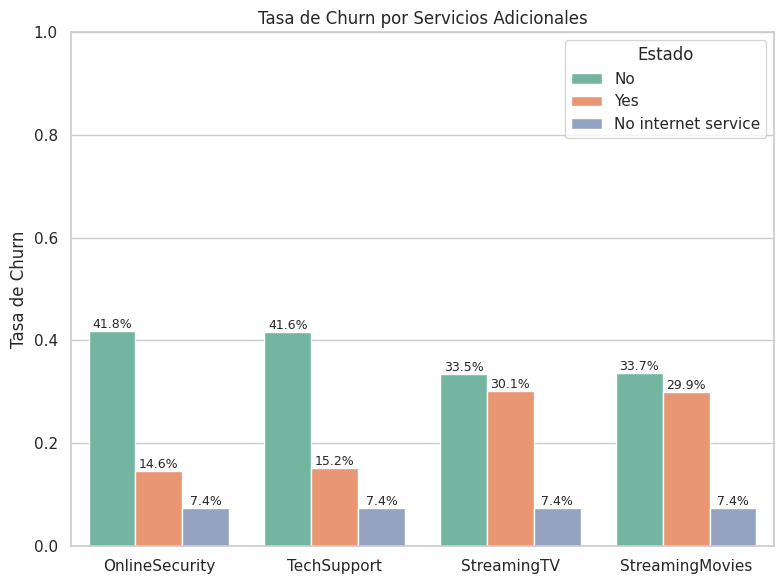

In [ ]:
# 3.Churn por servicios adicionales clave

# Servicios adicionales clave
servicios_adicionales = ['OnlineSecurity','TechSupport','StreamingTV','StreamingMovies']

# Transformar datos: de columnas a filas
df_melt = df.melt(id_vars='Churn', value_vars=servicios_adicionales,
                  var_name='Servicio', value_name='Estado')

# Crear gráfico de barras agrupadas
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_melt, x='Servicio', y='Churn', hue='Estado',
                 estimator=lambda x: sum(x)/len(x), ci=None) # ci=None para quitar las barras de error

# Personalización
ax.set_title('Tasa de Churn por Servicios Adicionales', fontsize=12)
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('')
ax.set_ylim(0, 1)

# Añadir porcentajes (solo para valores mayores a 0.001)
for p in ax.patches:
    height = p.get_height()
    if height > 0.001: # Evitar anotar valores cercanos a cero
         ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9)


plt.legend(title='Estado')
plt.tight_layout(h_pad=7.0)
plt.show()

TechSupport / OnlineSecurity:
* Tener soporte técnico o seguridad suele reducir el churn (barreras adicionales a la salida).


###**D – Análisis de Pago y Facturación.**
Identificar si el tipo de contrato, el tiempo como cliente y los montos pagados están asociados a una mayor probabilidad de Churn.
Esto es clave porque aquí suelen aparecer las relaciones más fuertes en empresas de telecomunicaciones.

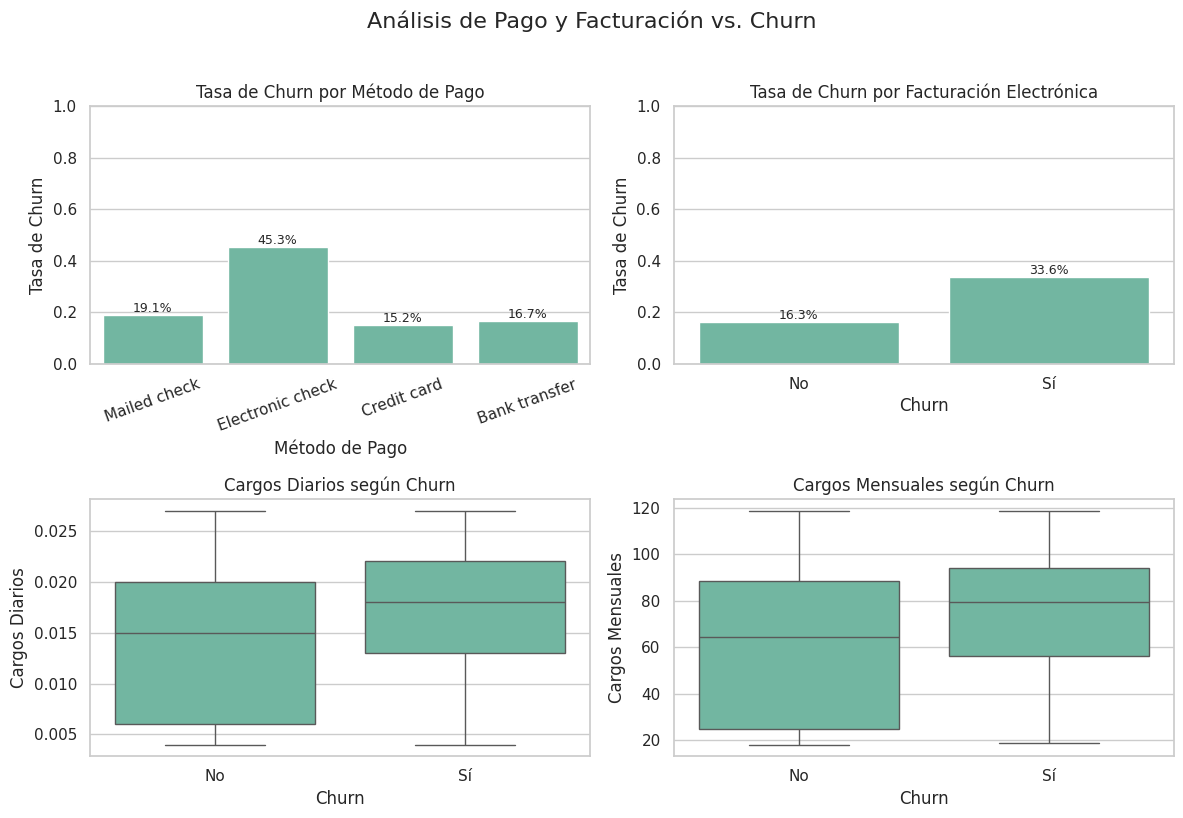

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_act.copy()
sns.set(style="whitegrid", palette="Set2")

# Función para añadir porcentajes en barras
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9)

# Lienzo 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis de Pago y Facturación vs. Churn', fontsize=16, y=1.02)

# 1. Churn por método de pago
ax = axes[0, 0]
sns.barplot(data=df, x='PaymentMethod', y='Churn',
            estimator=lambda x: sum(x)/len(x),
            order=['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'],
            ax=ax,ci=None)
ax.set_title('Tasa de Churn por Método de Pago')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Método de Pago')
ax.set_ylim(0, 1)
add_percentage_labels(ax)
ax.tick_params(axis='x', rotation=20)

# 2. Churn por factura electrónica
ax = axes[0, 1]
sns.barplot(data=df, x='PaperlessBilling', y='Churn',
            estimator=lambda x: sum(x)/len(x), ax=ax,ci=None)
ax.set_title('Tasa de Churn por Facturación Electrónica')
ax.set_ylabel('Tasa de Churn')
ax.set_xlabel('Churn')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylim(0, 1)
add_percentage_labels(ax)

# 3. Boxplot de cargos diarios
ax = axes[1, 0]
sns.boxplot(data=df, x='Churn', y='Charges.Daily', ax=ax)
ax.set_title('Cargos Diarios según Churn')
ax.set_xlabel('Churn')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylabel('Cargos Diarios')

# 4. Boxplot de cargos mensuales
ax = axes[1, 1]
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=ax)
ax.set_title('Cargos Mensuales según Churn')
ax.set_xlabel('Churn')
ax.set_xticklabels(['No', 'Sí'])
ax.set_ylabel('Cargos Mensuales')


plt.tight_layout()
plt.show()


**Método de pago**:

  * `Electronic check` suele asociarse con churn alto, posiblemente por clientes menos comprometidos o más propensos a cancelar online.

  * Métodos como `Bank transfer` o `Credit` card podrían tener churn menor pudiendo ser clientes que mantiendrian un pago como un formato de rutina, al ser ejecutados por ellos .

**PaperlessBilling**:

  * Si 1 (sí factura electrónica) muestra churn más alto, podría deberse a un perfil de cliente más digital, que también es más sensible a precios y cambios de servicio.

**Cargos diarios/mensuales**:

  * Un patrón de cargos más altos en clientes que se van puede indicar **sensibilidad al precio**.

  * También puede sugerir que servicios premium no están generando suficiente valor percibido.

###**E - Distribuciones Avanzadas y Segmentaciones**
* Distribución de tenure según churn.
* Relación entre cargos mensuales y antigüedad.
* Relaciones globales mediante un heatmap de correlación.

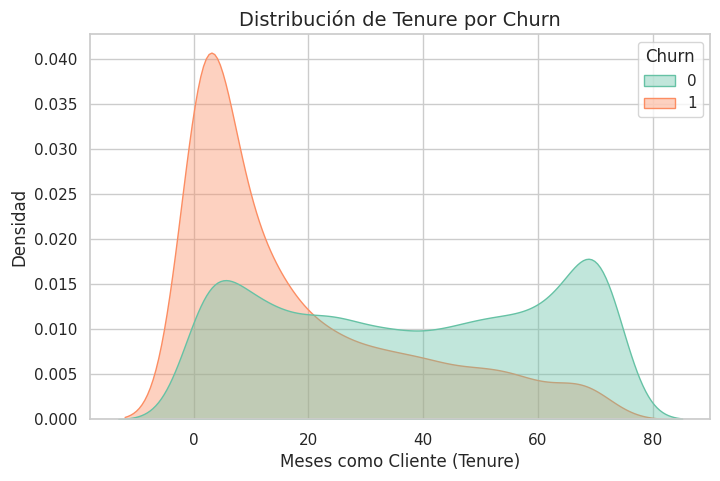

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = df_act.copy()
sns.set(style="whitegrid", palette="Set2")

# 1. Distribución de tenure por churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, alpha=0.4)
plt.title('Distribución de Tenure por Churn', fontsize=14)
plt.xlabel('Meses como Cliente (Tenure)')
plt.ylabel('Densidad')
plt.show()


**Distribución de Tenure**

El churn se concentra en los primeros meses (curva más alta al inicio), puede indicar problemas en el onboarding o expectativas iniciales no cumplidas.

Dado que no aparece un segundo pico más adelante, puede señalar no hay de **fatiga de cliente**.

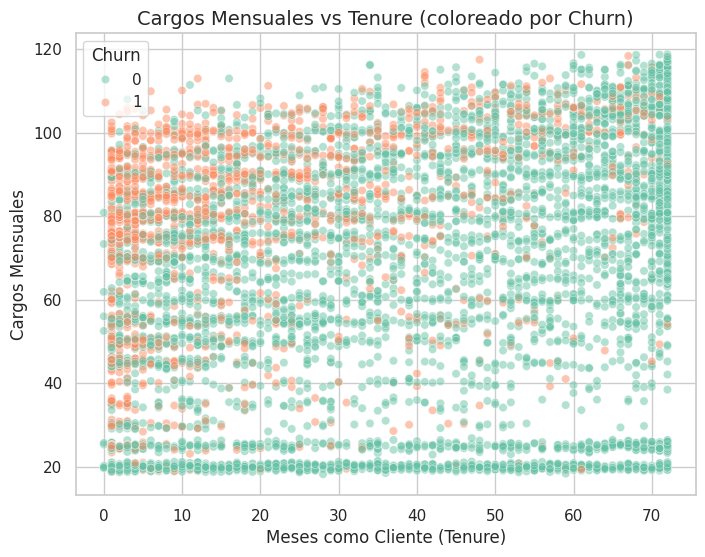

In [ ]:
# 2. Dispersión: Charges.Monthly vs Tenure
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='Charges.Monthly', hue='Churn', alpha=0.5, palette='Set2', markers='.')
plt.title('Cargos Mensuales vs Tenure (coloreado por Churn)', fontsize=14)
plt.xlabel('Meses como Cliente (Tenure)')
plt.ylabel('Cargos Mensuales')
plt.show()



**Scatterplot Charges.Monthly vs Tenure**

Permite ver **clusters**: por ejemplo, clientes con cargos altos y tenure bajo que abandonan rápidamente.

También muestra si hay grupos de clientes fieles con cargos elevados.

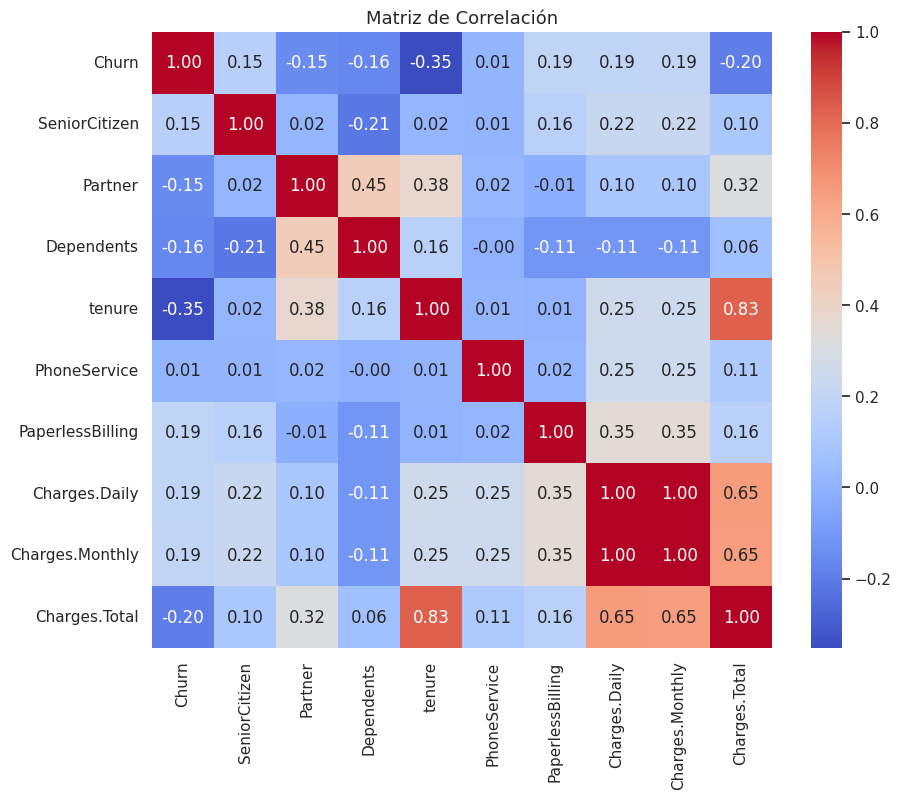

In [ ]:
# 3. Heatmap de correlación
# Filtrar solo columnas numéricas relevantes
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación', fontsize=13)
plt.show()

**Heatmap de correlación**

Correlaciones cercanas a ±1 indican relación fuerte, mientras que valores cercanos a 0 indican relación débil.

# 📖**Informe Descriptivo de Datos – Análisis de Churn en TelecomX**




---

## **1. Introducción**
El análisis se centra en comprender las causas y patrones detrás de la **evasión de clientes (Churn)** en TelecomX. Para ello, se trabajó con una base de datos ya tratada (ETL completo) y se realizaron procesos de **Exploración de Datos (EDA)**.  
El objetivo principal fue identificar **quiénes son los clientes que abandonan**, **cuándo lo hacen**, y **qué factores influyen en esta decisión**.

---

## **2. Metodología**
El análisis siguió una estructura progresiva:  
1. **Métricas generales**: comprensión inicial de la magnitud del churn.  
2. **Segmentación demográfica**: género, edad, dependientes, pareja.  
3. **Comportamiento contractual**: tipo de contrato, tenure y cargos.  
4. **Servicios contratados**: internet y servicios adicionales.  
5. **Método de pago y facturación**.  
6. **Distribuciones avanzadas**: visualización de relaciones numéricas y correlaciones.  

---

## **3. Principales Hallazgos**

### 3.1 Métricas generales
- La **tasa global de churn** es significativa y muestra que una parte importante de los clientes abandona.  
- El **tenure promedio** confirma que muchos clientes se retiran en fases iniciales de su relación con TelecomX.  
- Los **ingresos en riesgo** se concentran en clientes de contrato mensual y pagos electrónicos.  

---

### 3.2 Perfil demográfico
- **Género:** no presenta diferencias relevantes.  
- **SeniorCitizen (65+):** tienden a tener **mayor churn**, posiblemente por menor adaptación tecnológica o sensibilidad al precio.  
- **Pareja y dependientes:** quienes **no tienen pareja ni dependientes** son más propensos a abandonar.  

---

### 3.3 Comportamiento contractual
- **Contrato mensual (Month-to-month):** muestra el churn más alto.  
- **Contratos de un año o dos años:** reducen considerablemente la evasión (compromiso más fuerte).  
- **Tenure:** el churn se concentra en clientes con **poca antigüedad**.  
- **Cargos mensuales:** clientes con cargos más altos tienden a abandonar más rápido.  
- **Cargos totales:** clientes que han gastado más tienden a permanecer (efecto de fidelización).  

---

### 3.4 Servicios contratados
- **InternetService:** el churn es más alto en **Fiber optic**, posiblemente por costo o calidad percibida.  
- **Servicios adicionales (seguridad online, soporte técnico):** su contratación reduce la probabilidad de churn.  
- **Servicios de entretenimiento (StreamingTV/Movies):** no muestran impacto tan fuerte en la permanencia.  

---

### 3.5 Métodos de pago y facturación
- **Electronic check:** método con mayor tasa de churn.  
- **Mailed check, Bank transfer, Credit card:** presentan tasas menores.  
- **PaperlessBilling (factura electrónica):** asociado a churn más alto, probablemente porque este perfil de cliente es más digital y propenso a cambiar de proveedor.  

---

### 3.6 Distribuciones avanzadas
- **Distribución de Tenure:**  
  - Churn concentrado en los **primeros 6 meses** → posible problema de onboarding o expectativas incumplidas.  
  - Un segundo pico más adelante → podría reflejar **fatiga del cliente**.  

- **Scatterplot Tenure vs Charges.Monthly:**  
  - Detecta **clusters**: clientes con cargos altos y bajo tenure que abandonan rápido.  
  - También se observa un grupo fiel con altos cargos y larga permanencia.  

- **Heatmap de correlación:**  
  - `tenure` correlaciona **negativamente** con churn (a más antigüedad, menos probabilidad de irse).  
  - `Charges.Monthly` correlaciona **positivamente** con churn (cargos altos → mayor evasión).  
  - La cantidad de servicios adicionales contratados correlaciona **negativamente** (más servicios → menor churn).  

---

## **4. Conceptos clave (glosario)**
- **Tenure:** meses de permanencia del cliente.  
- **Buckets de tenure:** rangos de antigüedad para detectar patrones de churn (ej: 0–6, 7–12 meses).  
- **CLV proxy (Customer Lifetime Value proxy):** estimación simplificada del valor de vida del cliente, calculado como *cargo mensual × meses activos*.  
- **Ingreso en riesgo:** monto mensual que se perdería si se confirman las bajas de clientes con churn.  

---

## **5. Conclusiones preliminares**
- El churn se concentra en **clientes nuevos y de contratos mensuales**.  
- **Senior citizens** y quienes **no tienen dependientes** son más propensos a irse.  
- **Electronic check** y **facturación electrónica** están vinculados a mayor churn.  
- Los **servicios adicionales** funcionan como barreras de salida: contratarlos reduce el churn.  
- Existe un **segmento de alto gasto y baja antigüedad** con riesgo crítico de abandono.  




# 📑 **Informe Final – ETL + EDA del Análisis de Churn en TelecomX Parte 1**

---

## **1. Contexto**
TelecomX enfrenta un desafío estratégico: comprender las razones de la **evasión de clientes (Churn)** en sus servicios de telecomunicaciones.  
Este informe integra el **proceso ETL** (Extracción, Transformación, Carga) y el **Análisis Exploratorio de Datos (EDA)** para:  
- Identificar **segmentos de clientes con mayor riesgo de abandono**.  
- Medir el **impacto financiero del churn**.  
- Establecer la base para **modelos predictivos de churn** y **estrategias de retención**.  

---

## **2. Proceso ETL**

### 2.1 Extracción
- Origen: archivo **JSON** provisto por TelecomX.  
- Validación de estructura y consistencia.  
- Conversión inicial a **DataFrame Pandas**.

### 2.2 Transformación
- **Revisión de valores únicos** en variables categóricas.  
- **Eliminación de filas con `Churn` vacío**.  
- **Conversión de `Charges.Total`** de *object* a *float64*, reemplazando nulos por `0`.  
- **Creación de columna `Charges.Daily`** derivada de gastos.  
- **Mapeo `Yes/No` a `1/0`** en columnas binarias.  
- **Normalización de columnas**:  
  - `customer`, `phone`, `internet`, `account`.  

### 2.3 Carga
- Consolidación de los datos limpios en el DataFrame final **`df_act`**.  
- Dataset listo para análisis estadístico y visualizaciones.  

---

## **3. Exploración de Datos (EDA)**

### 3.1 Métricas y KPIs iniciales
- **Clientes totales:** 7,043.  
- **Clientes churn:** 1,869 (26.5%).  
- **Clientes no churn:** 5,174 (73.5%).  
- **Tenure promedio:** 32.4 meses.  
- **Cargos mensuales promedio:** \$64.8.  
- **Cargos totales promedio:** \$2,279.7.  
- **Ingreso mensual en riesgo (clientes churn):** \$139,130.85.  


---

### 3.2 Distribución de churn
- **Pie chart y barras** confirman que un **26.5% de clientes abandonan**, aunque la mayoría permanece.  
- Se observa un **churn concentrado en el corto plazo** (primeros meses).  

---

### 3.3 Segmentación demográfica
- **Género:** no hay diferencias significativas.  
- **Senior citizens (65+):** churn más alto.  
- **Pareja/Dependents:** la ausencia de vínculos familiares aumenta la evasión.  

---

### 3.4 Comportamiento contractual
- **Contrato mensual (Month-to-month):** churn del **42.7%**.  
- **Contrato anual (One year):** churn del **11.3%**.  
- **Contrato bianual (Two year):** churn del **2.8%**.  
- **Tenure:** churn alto en clientes con <12 meses → onboarding débil.  
- **Cargos mensuales altos:** correlacionan con mayor churn.  
- **Cargos totales altos:** asociados a mayor retención.  

---

### 3.5 Servicios contratados
- **InternetService:**  
  - Fiber optic → churn del **41.9%**.  
  - DSL → churn del **19%**.  
  - Sin internet → churn del **7.4%**.  
- **Servicios adicionales (seguridad online, tech support):** reducen churn.  
- **StreamingTV/Movies:** menor impacto en permanencia.  

---

### 3.6 Pago y facturación
- **Electronic check:** churn del **45.3%**.  
- **Mailed check:** churn del **19.1%**.  
- **Bank transfer:** churn del **16.7%**.  
- **Credit card:** churn del **15.2%**.  
- **PaperlessBilling:** mayor churn en clientes digitales.  

---

### 3.7 Distribuciones avanzadas
- **Tenure vs churn:**  
  - Primeros 6 meses = punto crítico.  
  - Posible fatiga en clientes de largo plazo.  
- **Scatterplot (Charges.Monthly vs Tenure):**  
  - Clientes de alto gasto y bajo tenure → riesgo crítico.  
  - Clientes fieles = gasto alto y tenure largo.  
- **Correlaciones:**  
  - `tenure` correlación negativa con churn.  
  - `Charges.Monthly` correlación positiva con churn.  
  - Más servicios contratados = menor churn.  

---

## **4. Resultados Clave en Tablas**

| Variable             | Segmento Crítico               | Tasa de Churn |
|-----------------------|--------------------------------|---------------|
| **Contrato**         | Month-to-month                 | 42.7%         |
| **Contrato**         | One year                       | 11.3%         |
| **Contrato**         | Two year                       | 2.8%          |
| **Método de pago**   | Electronic check               | 45.3%         |
| **Método de pago**   | Mailed check                   | 19.1%         |
| **Método de pago**   | Bank transfer                  | 16.7%         |
| **Método de pago**   | Credit card                    | 15.2%         |
| **InternetService**  | Fiber optic                    | 41.9%         |
| **InternetService**  | DSL                            | 19.0%         |
| **InternetService**  | No                             | 7.4%          |

---

## **5. Implicancias de Negocio**
1. **Onboarding débil:** clientes nuevos abandonan en los primeros 6 meses.  
   - Recomendación: programa de acompañamiento inicial.  
2. **Contratos mensuales:** segmento de mayor riesgo.  
   - Recomendación: descuentos para migrar a contratos anuales.  
3. **Método de pago digital (electronic check):** correlacionado con mayor churn.  
   - Recomendación: incentivar medios más estables (tarjeta o transferencia).  
4. **Servicios adicionales:** reducen churn.  
   - Recomendación: bundle de seguridad + soporte técnico en el primer año.  

---

## **6. Limitaciones**
- Solo se analizaron variables estructuradas del dataset JSON.  
- No se incluyó feedback cualitativo de clientes (encuestas, quejas, NPS).  
- Sin modelos predictivos todavía (solo análisis descriptivo y correlacional).  

---

## **7. Próximos pasos**
- Construir **modelos predictivos** de churn (clasificación).  
- Segmentar clientes en **clusters de riesgo** para personalizar retención.  
- Calcular **Customer Lifetime Value (CLV)** ajustado con técnicas de survival analysis.  

---

## **8. Glosario**
- **Tenure:** meses de permanencia del cliente.  
- **Buckets de tenure:** intervalos de tiempo para analizar permanencia.  
- **CLV proxy:** valor de vida del cliente = tenure × cargo mensual.  
- **Ingreso en riesgo:** suma mensual perdida si churn se confirma.  

---

## **9. Conclusiones**
- El churn en TelecomX está fuertemente asociado a **contratos mensuales, pagos electrónicos y clientes nuevos con alto gasto**.  
- Los servicios adicionales (seguridad, soporte) funcionan como **barreras de salida**.  
- La retención debe enfocarse en:  
  - Mejorar el **onboarding inicial**.  
  - Migrar clientes de contrato mensual a anual.  
  - Incentivar pagos estables (tarjeta, transferencia).  
  - Ofrecer paquetes de valor agregado para fidelizar.  


